# Q-AnT Manual

Quantitative Analysis Trading (Q-AnT) is a platform to gather and manage information about corporate shares.

This document explains the most important steps in the usage of Q-Ant. It includes the basic commands to perform operation, run the classification algorithm and download input data.

## Initialize

In [2]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import datetime as dt
import time as tt
from QAnT import stock
from QAnT import Index

from scipy.stats import norm
from scipy.stats import levy
import matplotlib.mlab as mlab

# Load the stock and index classes

The initialization of the stock and index classes is done by the following commands:

In [3]:
s = stock(debug=True, verbose=True)

2017-12-06 11:30:30  IT0001233417  A2A               |deb|  Reading saved quote
2017-12-06 11:30:30  IT0001233417  A2A               |log|  Found 0 quotes


In [4]:
i = Index(debug=True, verbose=True)

2017-12-06 11:30:30  ^GDAXI        DAX               |deb|  Reading saved quote for all indices
2017-12-06 11:30:32  ^GDAXI        DAX               |deb|  Found 140801 quotes in database
2017-12-06 11:30:32  ^GDAXI        DAX               |deb|  Splitting quote_saved into dictionary


# Downloading data
## Download keyratios from MorningStar and save to database

If we have new companies in our database, we may want to download the keyratios from morningstar.

In [5]:
s.switch_next()
s.load_keyratios(deletecsv=True)

2017-12-06 10:35:52  DE0005408116  AAREAL BANK AG    |log|  Reading saved quote for stock AAREAL BANK AG
2017-12-06 10:35:53  DE0005408116  AAREAL BANK AG    |log|  Writing output to tmpfiles/DE_ARL.csv
2017-12-06 10:35:53  DE0005408116  AAREAL BANK AG    |log|  Name: AAREAL BANK AG         |    Aareal Bank AG     
2017-12-06 10:35:53  DE0005408116  AAREAL BANK AG    |deb|  Correcting column names
2017-12-06 10:35:53  DE0005408116  AAREAL BANK AG    |deb|  Formatting keyratios
2017-12-06 10:35:53  DE0005408116  AAREAL BANK AG    |deb|  Cleaning up the column strings
2017-12-06 10:35:53  DE0005408116  AAREAL BANK AG    |deb|  Formatting keyratios
2017-12-06 10:35:53  DE0005408116  AAREAL BANK AG    |deb|  Found saved and downloaded keyratio tables with sizes 11 and 11
2017-12-06 10:35:53  DE0005408116  AAREAL BANK AG    |log|  No entries to save
2017-12-06 10:35:53  DE0005408116  AAREAL BANK AG    |log|  Removing temporary output file tmpfiles/DE_ARL.csv


## Download quotes from Yahoo

Let's select the Munich Re stock and download the quote. There are two different modes of operation for the quote downloading algorithm. If the algorithm is called for the first time, Q-AnT tries all exchanges and selects that with the largest available data set. If quotes are already stored for the stock, Q-AnT uses the same exchange as for the previous data. 

In [5]:
s.switch_isin('DE0008430026')

2017-12-06 11:30:34  DE0008430026  MUENCH.RUECKVERS. |deb|  Switched to new stock: MUENCH.RUECKVERS.VNA O.N.
2017-12-06 11:30:34  DE0008430026  MUENCH.RUECKVERS. |deb|  ISIN & Ticker:         DE0008430026, MUV2
2017-12-06 11:30:34  DE0008430026  MUENCH.RUECKVERS. |deb|  Reading saved quote
2017-12-06 11:30:34  DE0008430026  MUENCH.RUECKVERS. |log|  Found 4957 quotes


In [5]:
s._download_quote_yahoo()

2017-12-06 11:19:00  DE0008430026  MUENCH.RUECKVERS. |log|  Donwloading quote with ticker symbol MUV2
2017-12-06 11:19:00  DE0008430026  MUENCH.RUECKVERS. |log|  Found the following unit of the key ratios: EUR
2017-12-06 11:19:02  DE0008430026  MUENCH.RUECKVERS. |log|  Successfully loaded quote for MUV2 from yahoo, exchange .DE
2017-12-06 11:19:02  DE0008430026  MUENCH.RUECKVERS. |deb|  Finding longest quote
2017-12-06 11:19:02  DE0008430026  MUENCH.RUECKVERS. |log|  Check stock info at https://finance.yahoo.com/quote/MUV2.DE?p=MUV2.DE
2017-12-06 11:19:02  DE0008430026  MUENCH.RUECKVERS. |deb|  Reading saved quote
2017-12-06 11:19:02  DE0008430026  MUENCH.RUECKVERS. |log|  Found 4938 quotes
2017-12-06 11:19:02  DE0008430026  MUENCH.RUECKVERS. |log|  Found 19 quotes to save
2017-12-06 11:19:02  DE0008430026  MUENCH.RUECKVERS. |deb|  currency of quote_to_save: ['EUR']
2017-12-06 11:19:02  DE0008430026  MUENCH.RUECKVERS. |deb|  currency of quote_saved  : ['EUR']
2017-12-06 11:19:02  DE000

## Download Quarterly Report Dates 

In [6]:
s.debug=False
s._save_unsaved_quarterly_report_dates()

2017-12-06 11:31:25  DE0008430026  MUENCH.RUECKVERS. |log|  Downloading quarterly report dates from
2017-12-06 11:31:25  DE0008430026  MUENCH.RUECKVERS. |log|  http://www.finanzen.net/termine/Muenchener_Rueck
2017-12-06 11:31:25  DE0008430026  MUENCH.RUECKVERS. |log|  Found quarterly report table with 4 entries
2017-12-06 11:31:25  DE0008430026  MUENCH.RUECKVERS. |log|  Reading saved quarterly report dates
2017-12-06 11:31:25  DE0008430026  MUENCH.RUECKVERS. |log|  Found 1 quarterly report dates to save
2017-12-06 11:31:25  DE0008430026  MUENCH.RUECKVERS. |log|  Successfully saved 1 entries in quarterly report database
2017-12-06 11:31:25  DE0008430026  MUENCH.RUECKVERS. |log|  Reading saved quarterly report dates


# Deploying the algorithm

## Quantitative Analysis of Fundamentals and Quotes

Run the Q-AnT algorithm for the stock presently loaded. 

In [6]:
s.get_summary(save=True)

2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Earnings Growth: 0.07962780402683078
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG   |err|  PresentRoIC is of type None
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Financial company, applying different criteria for equity ratio
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Checking dividend growth
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Latest dividend 1.2
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Previous dividend nan
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Calculating fair price from P/E ratio
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Selected quantile: 0.5
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Connected to sqlite database algo_results.db
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Removing old output
2017-12-06 10:43:07  DE0005408116  AAREAL BANK AG    |log|  Adding new result
2

Show the result of the quantitative analysis

In [7]:
s.quant_result

,Name,ISIN,Parameter,Value,Point
0,AAREAL BANK AG,DE0005408116,OnlyPositiveEarnings,0,1
1,AAREAL BANK AG,DE0005408116,AnnualEarningsGrowth,8.0,1
2,AAREAL BANK AG,DE0005408116,BookValueGrowth,69.2,0
3,AAREAL BANK AG,DE0005408116,HistoricROE,3.3,-1
4,AAREAL BANK AG,DE0005408116,PresentROE,7.0,-1
5,AAREAL BANK AG,DE0005408116,PresentRoIC,0.0,-1
6,AAREAL BANK AG,DE0005408116,EquityRatio,6.0,0
7,AAREAL BANK AG,DE0005408116,EBTMargin,100.0,1
8,AAREAL BANK AG,DE0005408116,DividendGrowth,nan,0
9,AAREAL BANK AG,DE0005408116,SixMonthReturn,-6.2,-1


In [8]:
s.summary

,Name,ISIN,FairPrice,FairPricePE,Price,Points
0,AAREAL BANK AG,DE0005408116,110.642442,29.418995,35.994999,0


If we want to save the output to 

    output/algo_results.db
    
we can use the save option. The conservative option is used to specify wheter the calculation of the fair price should take into account earnings growth which is determined from historical earnings growth.

In [7]:
s.get_summary(save=True,conservative=True)
s.analyze_quote()

2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Earnings Growth: -0.0025444379905804615
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS.|err|  PresentRoIC is of type None
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Financial company, applying different criteria for equity ratio
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Checking dividend growth
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Latest dividend 7.75
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Previous dividend nan
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Calculating fair price from P/E ratio
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Selected quantile: 0.5
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Connected to sqlite database algo_results.db
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Removing old output
2017-12-06 11:35:19  DE0008430026  MUENCH.RUECKVERS. |log|  Adding new resu

In [12]:
s.quant_result

,Name,ISIN,Parameter,Value,Point
0,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,OnlyPositiveEarnings,0,1
1,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,AnnualEarningsGrowth,-0.3,-1
2,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,BookValueGrowth,72.5,0
3,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,HistoricROE,3.1,-1
4,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,PresentROE,8.3,-1
5,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,PresentRoIC,0.0,-1
6,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,EquityRatio,11.8,1
7,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,EBTMargin,6.2,0
8,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,DividendGrowth,nan,0
9,MUENCH.RUECKVERS.VNA O.N.,DE0008430026,SixMonthReturn,3.7,0


We can have a look at the fair price calculated by means of different valuation models. 

In [13]:
s.price, s.fairprice_low, s.fairprice_high, s.fairprice_pe

(183.89999399999999,
 395.60890352349668,
 393.06927705589942,
 128.63416001283358)

# Plotting 

## Interactive Summary
Q-AnT includes a basic plotting algorithm to summarize essential quantities. It can be called using the following function which will load an interactive plot in a new tab.

In [15]:
s.interactive_summary()

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5 ]  [ (3,2) x6,y6 ]
[ (4,1) x7,y7 ]  [ (4,2) x8,y8 ]



## Basic Plotting

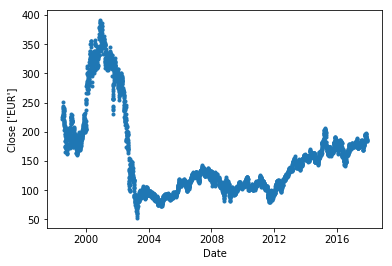

In [19]:
plt.plot(s.quote['date'], s.quote['close'],'.')
plt.xlabel("Date")
plt.ylabel("Close ['EUR']")
plt.show()

# Logging

The stock and index classes save every generated output to the logging databases stored in the files

    output/algo.log
    output/algo.err